In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

import pandas as pd

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import boxcox 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as mape

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_B.csv' # содержит только имя файла, без имен папок

In [6]:
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)

In [7]:
# Блок(и) обучения и поверки модели

In [8]:
#столбцы для выбора['22','2','27','20','25','25']
train=train[['22','2','27','20','25','25','price']]
test=test[['22','2','27','20','25','25']]

In [9]:
test

,22,2,27,20,25,25
0,1.421812,0.161178,-0.679063,-0.554035,0.224410,0.224410
1,-0.570187,0.419463,-0.679063,-0.554035,-0.929397,-0.929397
2,1.421812,0.853013,1.472618,-0.554035,2.532024,2.532024
3,1.421812,0.668524,1.472618,1.804941,0.224410,0.224410
4,1.421812,0.391790,1.472618,-0.554035,2.532024,2.532024
...,...,...,...,...,...,...
132,-0.570187,0.410239,-0.679063,1.804941,-0.929397,-0.929397
133,-0.570187,1.337297,-0.679063,-0.554035,-0.929397,-0.929397
134,1.421812,0.640850,1.472618,-0.554035,0.224410,0.224410
135,1.421812,-0.908859,-0.679063,-0.554035,-0.929397,-0.929397


In [10]:
regression_pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()), 
    ("regression", Ridge(alpha=18))])
regression_pipeline.fit(train.drop('price',axis=1),train.price)


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('regression', Ridge(alpha=18))])

In [11]:
# Блок предсказания с использованием тестового набора

In [12]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = regression_pipeline.predict(test)

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,886,309
 
----------------------
   MAPE Error: 17.94
----------------------


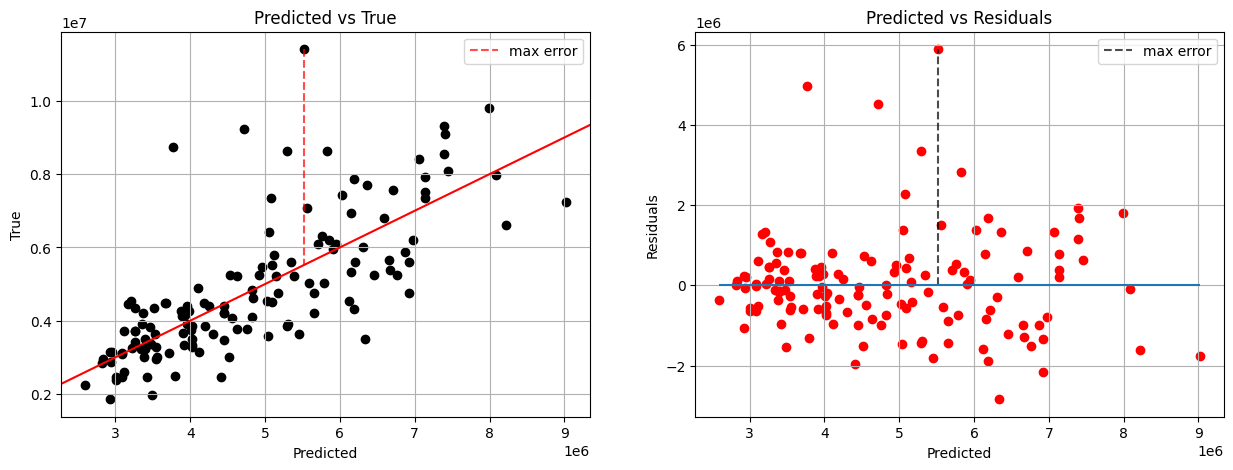

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [14]:
mask = ['22','2','27','20','25','25']

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
